# 1. Imports and read in product.csv

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import re

In [3]:
product = pd.read_csv('/data/p_dsi/teams2023/bridgestone_data/data/product.csv',sep = "|")
product.info()
product.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56842 entries, 0 to 56841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ARTICLE_ID       56842 non-null  int64  
 1   PROD_GROUP_CODE  56818 non-null  float64
 2   PROD_GROUP_DESC  56818 non-null  object 
 3   CATEGORY_CODE    56818 non-null  float64
 4   CATEGORY_DESC    56818 non-null  object 
 5   SEGMENT_CODE     56818 non-null  float64
 6   SEGMENT_DESC     56818 non-null  object 
 7   CLASS_CODE       56818 non-null  float64
 8   CLASS_DESC       56818 non-null  object 
 9   DISCOUNT_FLAG    56818 non-null  object 
 10  CROSS_SECTION    35670 non-null  object 
 11  ASPECT_RATIO     35665 non-null  object 
 12  RIM_SIZE         35504 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.6+ MB


,ARTICLE_ID,PROD_GROUP_CODE,PROD_GROUP_DESC,CATEGORY_CODE,CATEGORY_DESC,SEGMENT_CODE,SEGMENT_DESC,CLASS_CODE,CLASS_DESC,DISCOUNT_FLAG,CROSS_SECTION,ASPECT_RATIO,RIM_SIZE
36952,7012811,3.0,Other,6.0,Other,7.0,Equipment,8.0,Other Equipment,N,NaN,NaN,NaN
2807,7091636,5.0,Tires,26.0,Passenger Tires,29.0,Performance Tires,40.0,Ultra High Performance Summer,N,225,55,16
36869,7002712,3.0,Other,6.0,Other,7.0,Equipment,8.0,Other Equipment,N,NaN,NaN,NaN
49318,7005687,4.0,Services,73.0,Brake Systems,102.0,Brake Service,516.0,Brake Pads,N,NaN,NaN,NaN
17063,7090519,5.0,Tires,26.0,Passenger Tires,29.0,Performance Tires,39.0,Touring H/V/Z Tires,Y,NONE,NONE,NONE
8835,1167,5.0,Tires,26.0,Passenger Tires,1135.0,Snow Tires-PS,1136.0,Snow Tires,N,185,60,15
53582,7008844,4.0,Services,73.0,Brake Systems,102.0,Brake Service,516.0,Brake Pads,N,NaN,NaN,NaN
56706,149558,5.0,Tires,26.0,Passenger Tires,1135.0,Snow Tires-PS,1136.0,Snow Tires,N,265,60,17
13197,7011740,5.0,Tires,26.0,Passenger Tires,28.0,Import Tires,32.0,Import Tires,N,185,70,13
22362,7088075,5.0,Tires,44.0,Light Truck Tires,47.0,Commercial Tires,51.0,Highway Tires,N,225,75,16


# 2. Extract sales.csv paths

In [31]:
paths = glob.glob('/data/p_dsi/teams2023/team7/final_sales_201*')
paths.remove('/data/p_dsi/teams2023/team7/final_sales_2017.csv')
paths.remove('/data/p_dsi/teams2023/team7/final_sales_2016.csv')
paths.remove('/data/p_dsi/teams2023/team7/final_sales_2015.csv')
paths.remove('/data/p_dsi/teams2023/team7/final_sales_2018.csv')
len(paths)

43

paths are not sorted as you can see:

In [35]:
paths

['/data/p_dsi/teams2023/team7/final_sales_20161231.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20151231.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160531.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20170228.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20171231.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20180531.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20151031.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160930.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20180228.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20170630.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150731.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150630.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160331.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20180331.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150531.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20180131.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150430.csv',
 '/data/p_dsi/teams2023/team7/f

## 2.1 sort file paths

In [33]:
def get_date(filename):
    # Extracts the year, month, and day from the filename
    match = re.search(r'\d{8}', filename)
    return match.group(0)

sorted_paths = sorted(paths, key=get_date)

['/data/p_dsi/teams2023/team7/final_sales_20150430.csv', '/data/p_dsi/teams2023/team7/final_sales_20150531.csv', '/data/p_dsi/teams2023/team7/final_sales_20150630.csv', '/data/p_dsi/teams2023/team7/final_sales_20150731.csv', '/data/p_dsi/teams2023/team7/final_sales_20150831.csv', '/data/p_dsi/teams2023/team7/final_sales_20150930.csv', '/data/p_dsi/teams2023/team7/final_sales_20151031.csv', '/data/p_dsi/teams2023/team7/final_sales_20151130.csv', '/data/p_dsi/teams2023/team7/final_sales_20151231.csv', '/data/p_dsi/teams2023/team7/final_sales_20160131.csv', '/data/p_dsi/teams2023/team7/final_sales_20160229.csv', '/data/p_dsi/teams2023/team7/final_sales_20160331.csv', '/data/p_dsi/teams2023/team7/final_sales_20160430.csv', '/data/p_dsi/teams2023/team7/final_sales_20160531.csv', '/data/p_dsi/teams2023/team7/final_sales_20160630.csv', '/data/p_dsi/teams2023/team7/final_sales_20160731.csv', '/data/p_dsi/teams2023/team7/final_sales_20160831.csv', '/data/p_dsi/teams2023/team7/final_sales_201609

In [34]:
sorted_paths

['/data/p_dsi/teams2023/team7/final_sales_20150430.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150531.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150630.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150731.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150831.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20150930.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20151031.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20151130.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20151231.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160131.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160229.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160331.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160430.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160531.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160630.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160731.csv',
 '/data/p_dsi/teams2023/team7/final_sales_20160831.csv',
 '/data/p_dsi/teams2023/team7/f

In [ ]:
years = ["2015", "2016", "2017", "2018"]

# PROD_GROUP_DESC

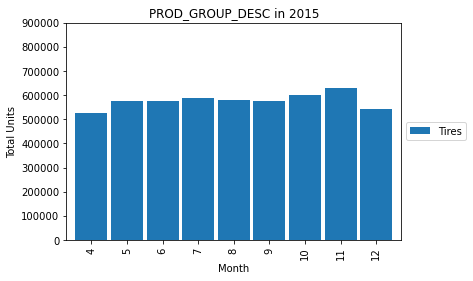

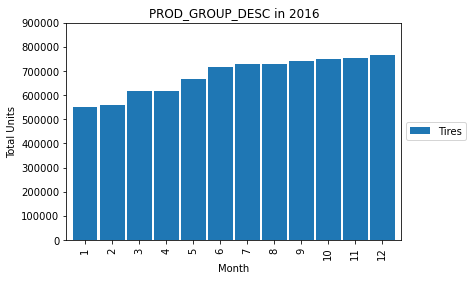

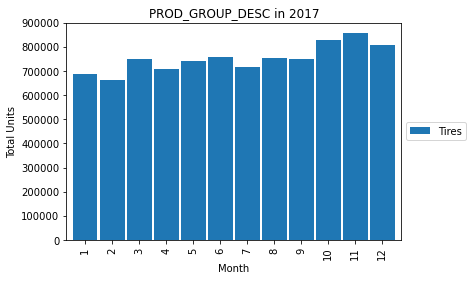

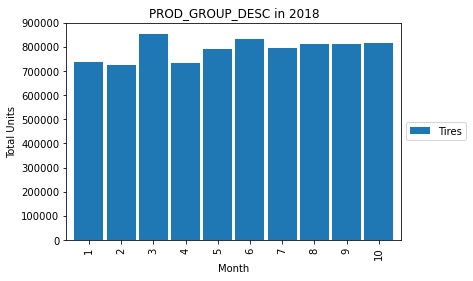

In [182]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'PROD_GROUP_DESC'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='PROD_GROUP_DESC', values='UNITS')

    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('PROD_GROUP_DESC in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 900000)

    # Show the plot
    plt.show()

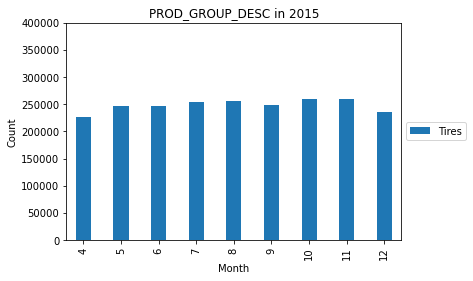

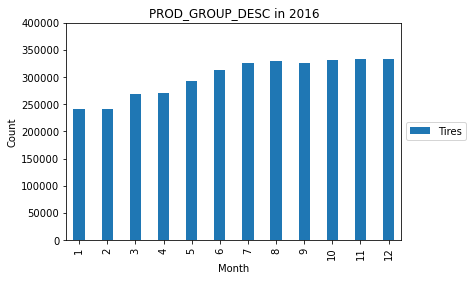

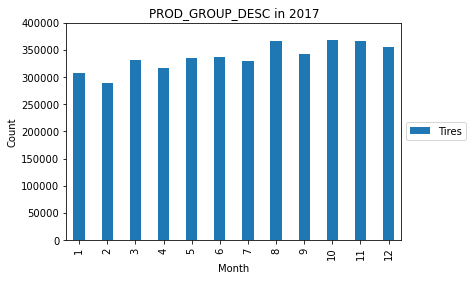

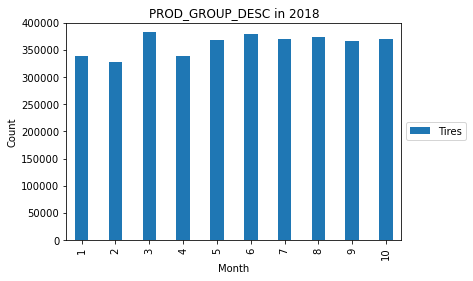

In [140]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    # Group by month and category description, and count occurrences
    grouped = merged_df.groupby(['MONTH', 'PROD_GROUP_DESC'])['PROD_GROUP_DESC'].count()

    # Reshape the resulting Series into a DataFrame
    grouped = grouped.unstack()

    # Plot the resulting DataFrame as a bar plot
    grouped.plot(kind='bar', position=0.5, width=0.4)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title('PROD_GROUP_DESC in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 400000)

    # Show the plot
    plt.show()

# CATEGORY_DESC

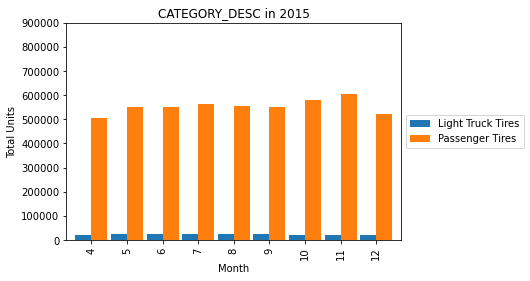

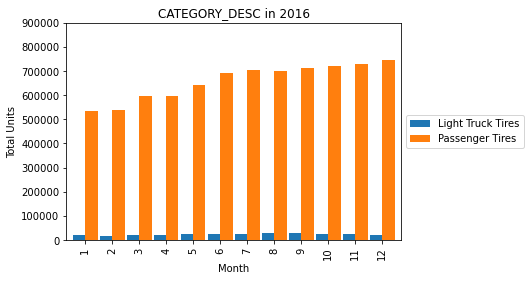

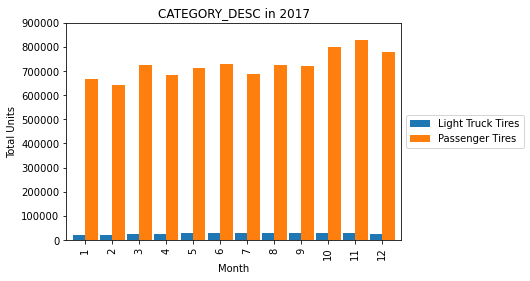

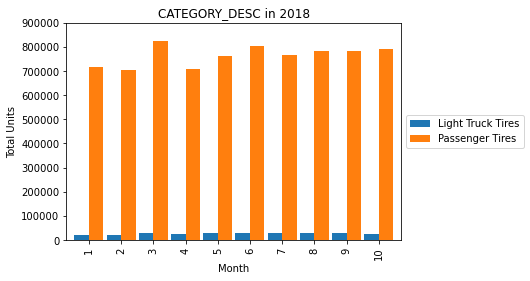

In [183]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'CATEGORY_DESC'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='CATEGORY_DESC', values='UNITS')

    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('CATEGORY_DESC in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 900000)

    # Show the plot
    plt.show()

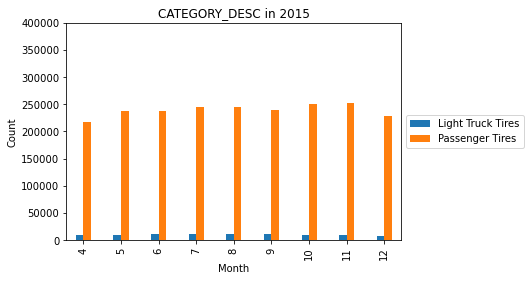

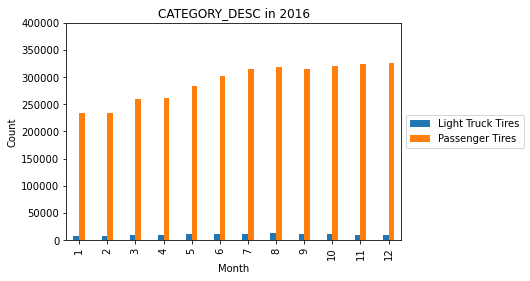

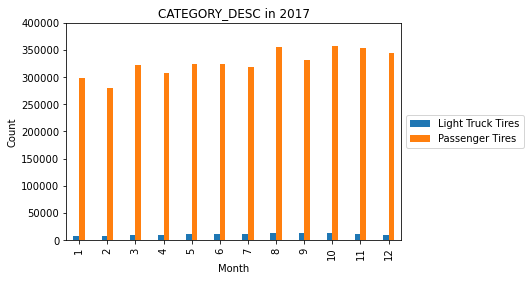

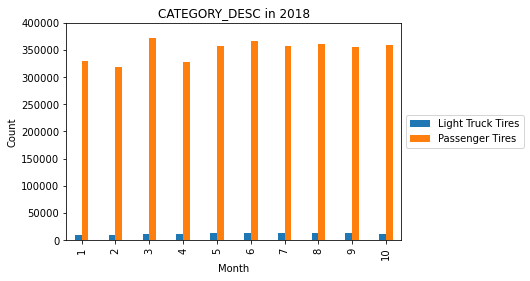

In [141]:
# for year in years:
#     path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
#     sales = pd.read_csv(path)
    
#     sales["DATE"] = pd.to_datetime(sales['DATE'])
#     sales['MONTH'] = sales['DATE'].dt.month
#     merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
#     # Group by month and category description, and count occurrences
#     grouped = merged_df.groupby(['MONTH', 'CATEGORY_DESC'])['CATEGORY_DESC'].count()

#     # Reshape the resulting Series into a DataFrame
#     grouped = grouped.unstack()

#     # Plot the resulting DataFrame as a bar plot
#     grouped.plot(kind='bar', position=0.5, width=0.4)

#     # Add labels and title to the plot
#     plt.xlabel('Month')
#     plt.ylabel('Count')
#     plt.title('CATEGORY_DESC in ' + year)
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.ylim(0, 400000)

#     # Show the plot
#     plt.show()

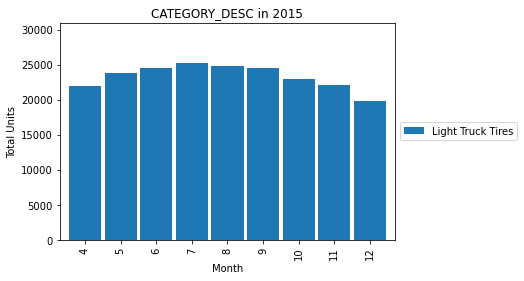

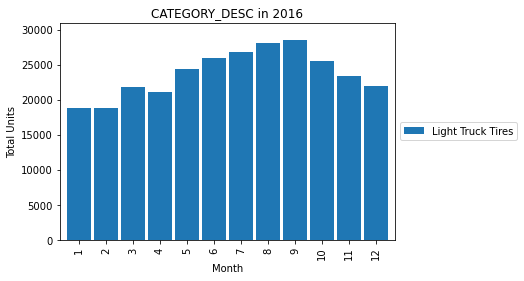

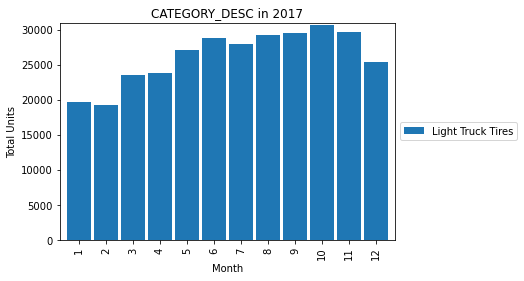

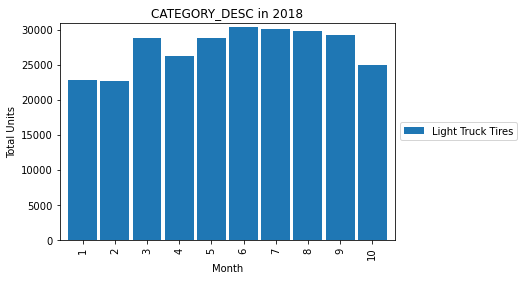

In [186]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'CATEGORY_DESC'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='CATEGORY_DESC', values='UNITS')
    
    pivot_df = pivot_df.drop("Passenger Tires", axis = 1)
    
    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('CATEGORY_DESC in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 31000)

    # Show the plot
    plt.show()

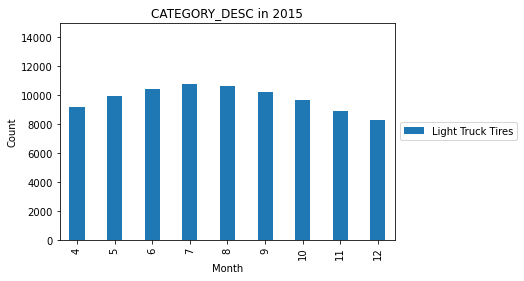

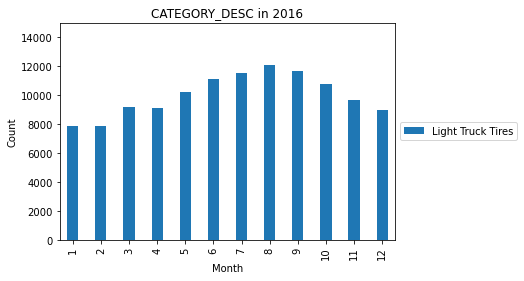

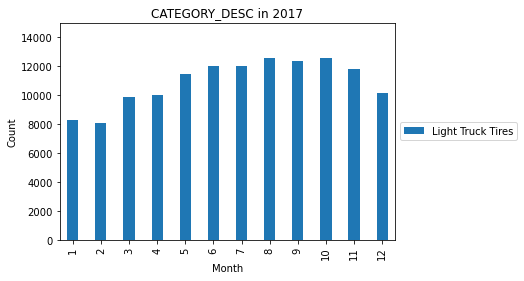

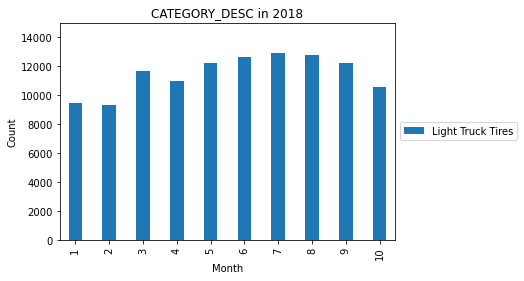

In [142]:
# for year in years:
#     path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
#     sales = pd.read_csv(path)
    
#     sales["DATE"] = pd.to_datetime(sales['DATE'])
#     sales['MONTH'] = sales['DATE'].dt.month
#     merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
#     # Group by month and category description, and count occurrences
#     grouped = merged_df.groupby(['MONTH', 'CATEGORY_DESC'])['CATEGORY_DESC'].count()
#     # Reshape the resulting Series into a DataFrame
#     grouped = grouped.unstack()
#     grouped = grouped.drop("Passenger Tires", axis = 1)
#     # Plot the resulting DataFrame as a bar plot
#     grouped.plot(kind='bar', position=0.5, width=0.4)

#     # Add labels and title to the plot
#     plt.xlabel('Month')
#     plt.ylabel('Count')
#     plt.title('CATEGORY_DESC in ' + year)
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.ylim(0, 15000)

#     # Show the plot
#     plt.show()

# SEGMENT_DESC

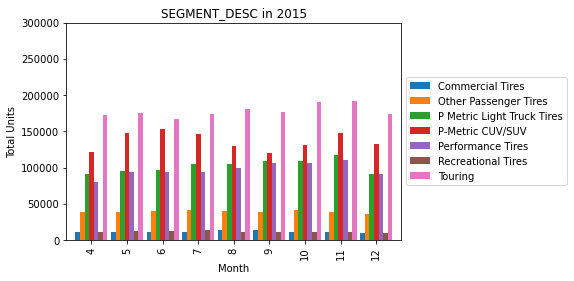

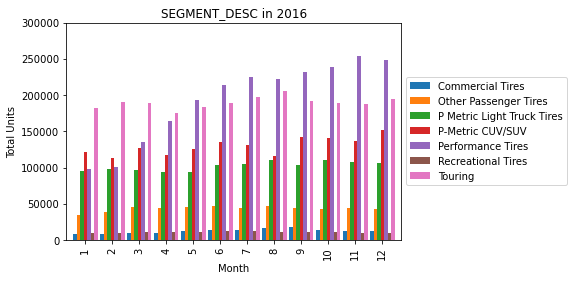

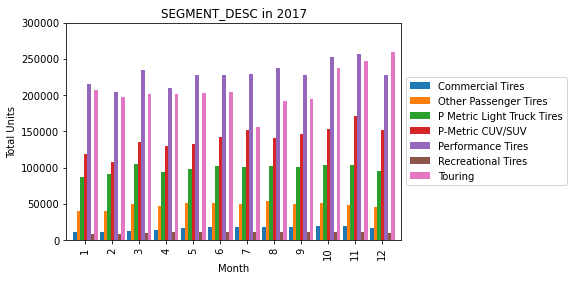

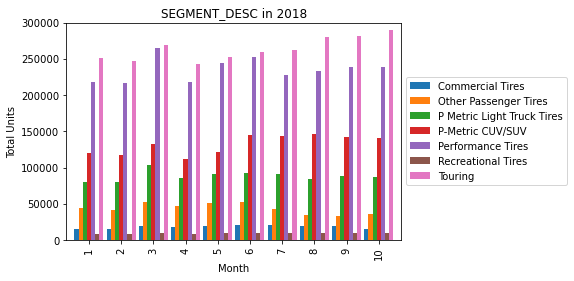

In [189]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'SEGMENT_DESC'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='SEGMENT_DESC', values='UNITS')

    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('SEGMENT_DESC in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 300000)

    # Show the plot
    plt.show()

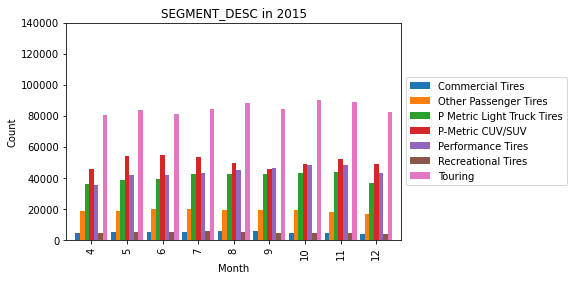

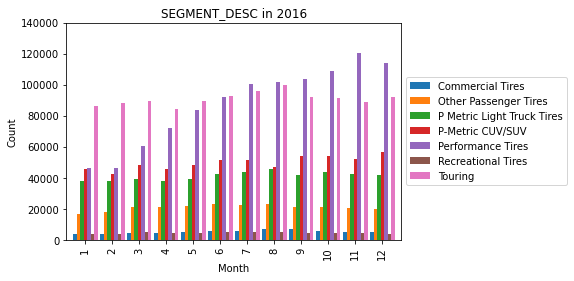

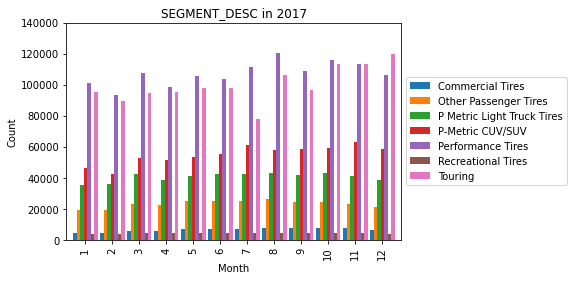

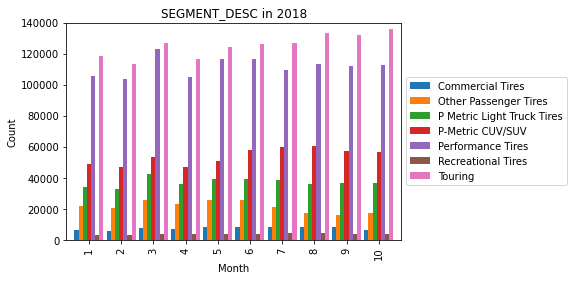

In [149]:
# for year in years:
#     path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
#     sales = pd.read_csv(path)
    
#     sales["DATE"] = pd.to_datetime(sales['DATE'])
#     sales['MONTH'] = sales['DATE'].dt.month
#     merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
#     # Group by month and category description, and count occurrences
#     grouped = merged_df.groupby(['MONTH', 'SEGMENT_DESC'])['SEGMENT_DESC'].count()

#     # Reshape the resulting Series into a DataFrame
#     grouped = grouped.unstack()

#     # Plot the resulting DataFrame as a bar plot
#     grouped.plot(kind='bar', position=0.5, width=0.9)

#     # Add labels and title to the plot
#     plt.xlabel('Month')
#     plt.ylabel('Count')
#     plt.title('SEGMENT_DESC in ' + year)
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.ylim(0, 140000)

#     # Show the plot
#     plt.show()

# CLASS_DESC

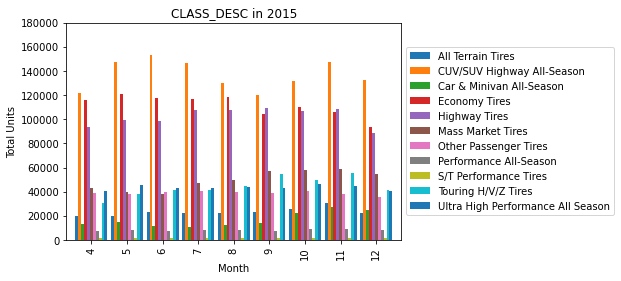

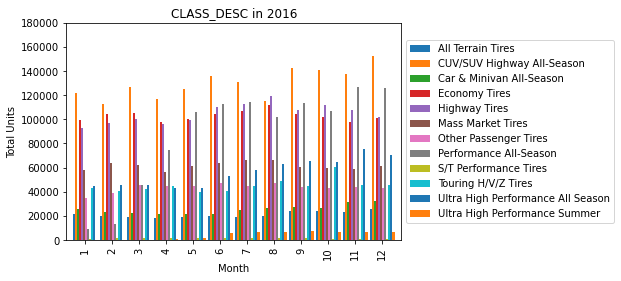

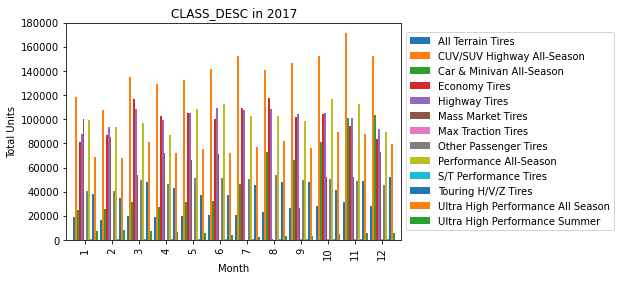

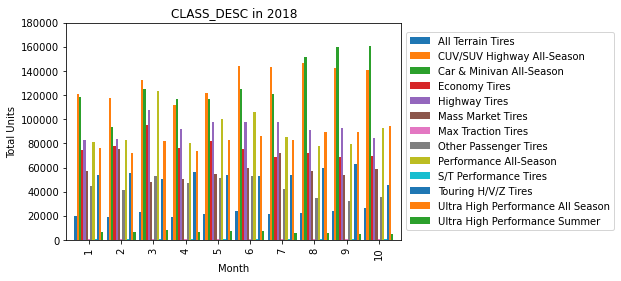

In [191]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'CLASS_DESC'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='CLASS_DESC', values='UNITS')

    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('CLASS_DESC in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 180000)

    # Show the plot
    plt.show()

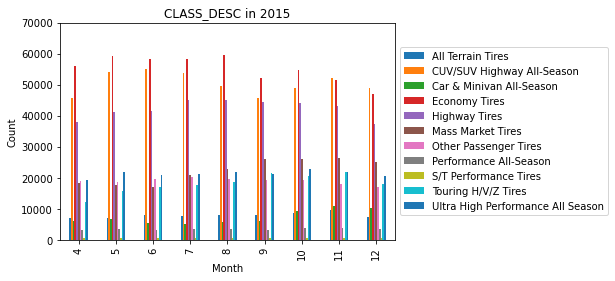

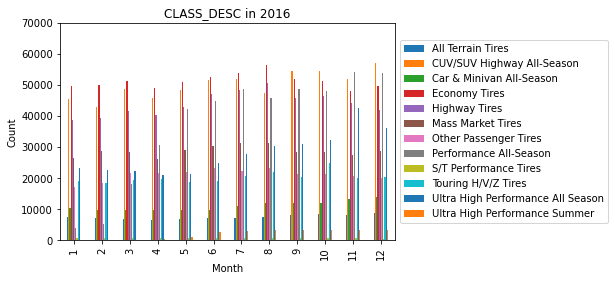

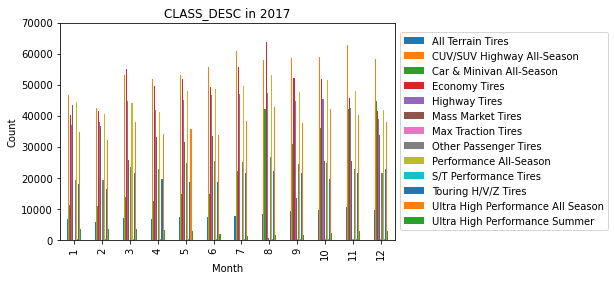

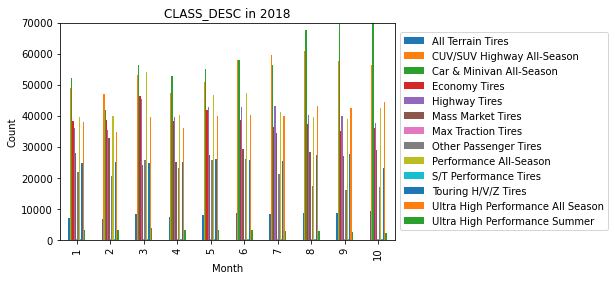

In [152]:
# for year in years:
#     path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
#     sales = pd.read_csv(path)
    
#     sales["DATE"] = pd.to_datetime(sales['DATE'])
#     sales['MONTH'] = sales['DATE'].dt.month
#     merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
#     # Group by month and category description, and count occurrences
#     grouped = merged_df.groupby(['MONTH', 'CLASS_DESC'])['CLASS_DESC'].count()

#     # Reshape the resulting Series into a DataFrame
#     grouped = grouped.unstack()

#     # Plot the resulting DataFrame as a bar plot
#     grouped.plot(kind='bar', position=0.5)

#     # Add labels and title to the plot
#     plt.xlabel('Month')
#     plt.ylabel('Count')
#     plt.title('CLASS_DESC in ' + year)
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.ylim(0, 70000)

#     # Show the plot
#     plt.show()

# DISCOUNT_FLAG

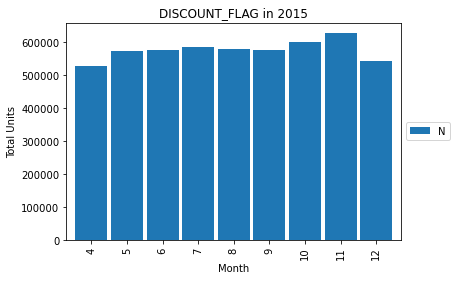

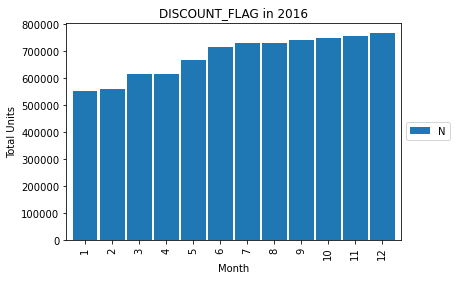

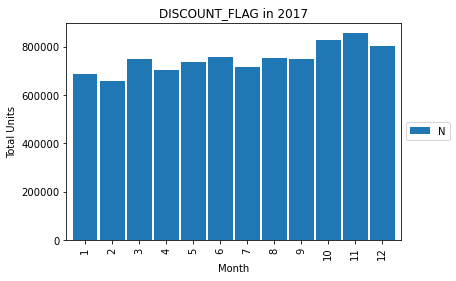

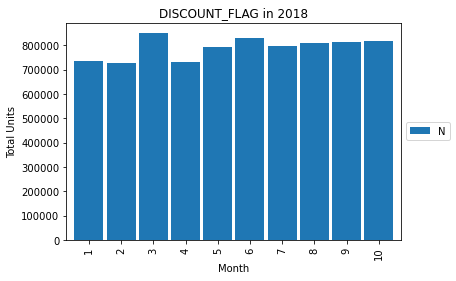

In [192]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'DISCOUNT_FLAG'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='DISCOUNT_FLAG', values='UNITS')

    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('DISCOUNT_FLAG in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.ylim(0, 180000)

    # Show the plot
    plt.show()

# CROSS_SECTION

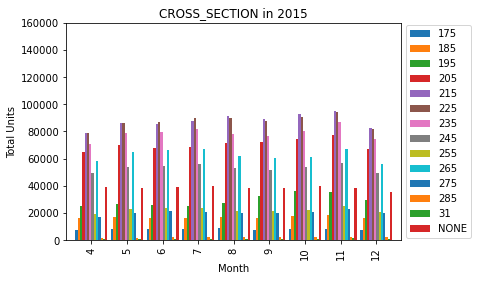

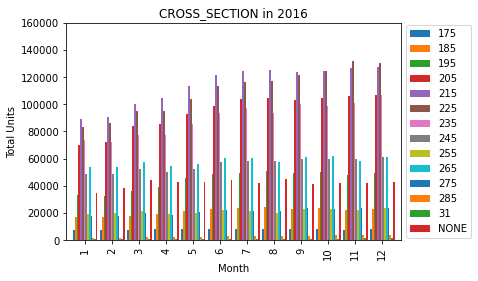

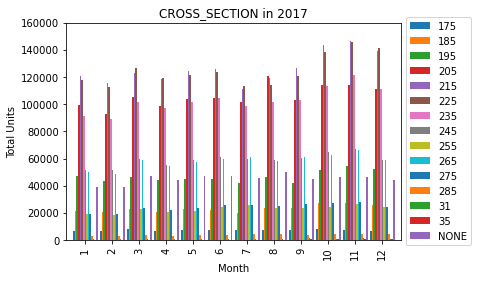

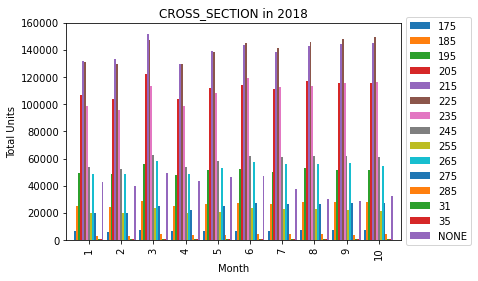

In [195]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'CROSS_SECTION'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='CROSS_SECTION', values='UNITS')

    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('CROSS_SECTION in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 160000)

    # Show the plot
    plt.show()

# ASPECT_RATIO

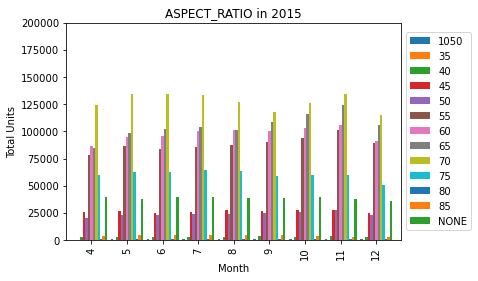

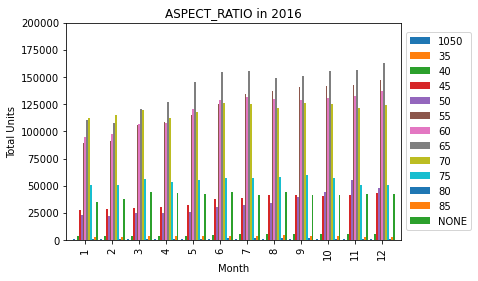

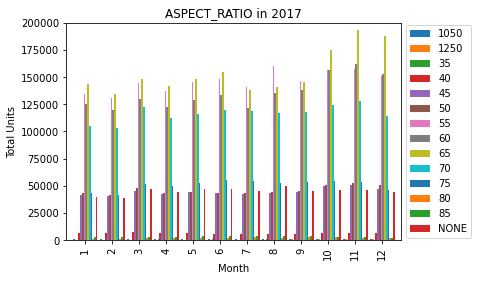

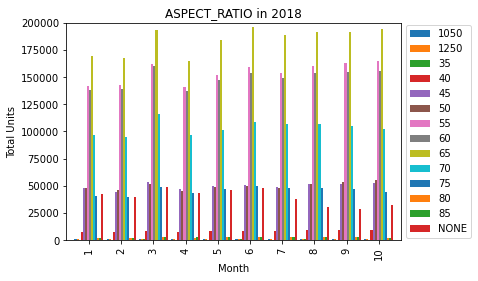

In [198]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'ASPECT_RATIO'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='ASPECT_RATIO', values='UNITS')

    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('ASPECT_RATIO in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 200000)

    # Show the plot
    plt.show()

# RIM_SIZE

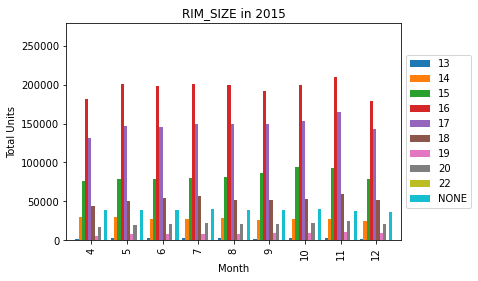

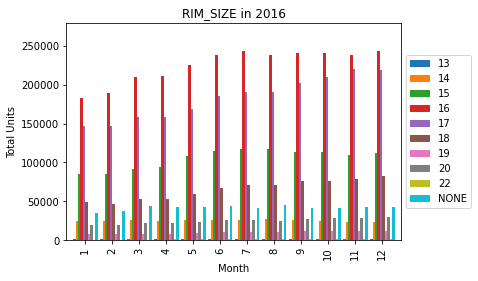

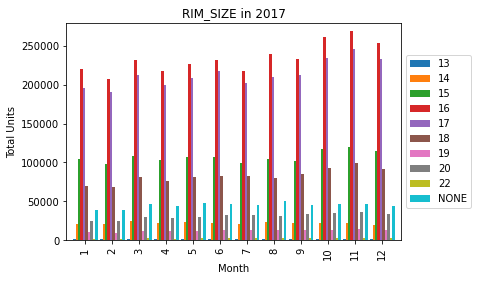

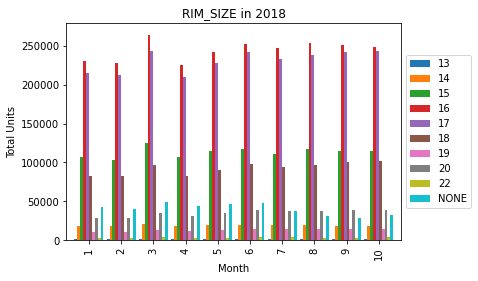

In [200]:
for year in years:
    path = "/data/p_dsi/teams2023/team7/final_sales_" + year + ".csv"
    sales = pd.read_csv(path)
    
    sales["DATE"] = pd.to_datetime(sales['DATE'])
    sales['MONTH'] = sales['DATE'].dt.month
    merged_df = pd.merge(sales, product, on = "ARTICLE_ID", how='left')
    
    # Group by month and category and sum units
    grouped_df = merged_df.groupby(['MONTH', 'RIM_SIZE'])['UNITS'].sum().reset_index()

    # Pivot the dataframe to get category as columns
    pivot_df = grouped_df.pivot(index='MONTH', columns='RIM_SIZE', values='UNITS')

    # Plot the resulting DataFrame as a bar plot
    pivot_df.plot(kind='bar', position=0.5, width=0.9)

    # Add labels and title to the plot
    plt.xlabel('Month')
    plt.ylabel('Total Units')
    plt.title('RIM_SIZE in ' + year)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylim(0, 280000)

    # Show the plot
    plt.show()

---

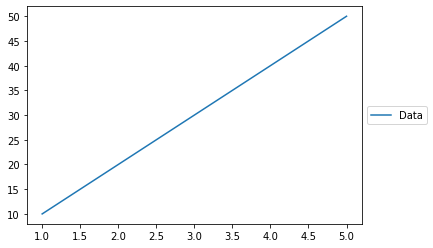

In [145]:

# # Create example data and plot it
# x = [1, 2, 3, 4, 5]
# y = [10, 20, 30, 40, 50]
# plt.plot(x, y, label='Data')

# # Add legend to the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# # Show the plot
# plt.show()

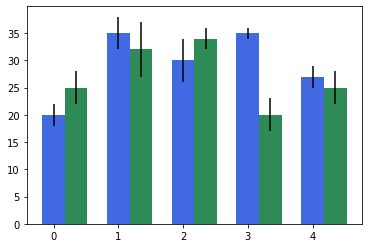

In [88]:
# import numpy as np
# import matplotlib.pyplot as plt

# N = 5
# menMeans = (20, 35, 30, 35, 27)
# menStd =   (2, 3, 4, 1, 2)

# ind = np.arange(N)  # the x locations for the groups
# width = 0.35       # the width of the bars

# fig = plt.figure()
# ax = fig.add_subplot(111)
# rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

# womenMeans = (25, 32, 34, 20, 25)
# womenStd =   (3, 5, 2, 3, 3)
# rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# plt.show()

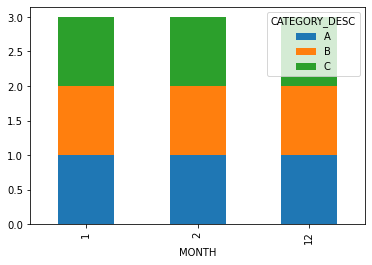

In [106]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create sample DataFrame
# df = pd.DataFrame({
#     'DATE': ['2016-12-01', '2017-01-01', '2017-02-01'] * 3,
#     'CATEGORY_DESC': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']
# })

# # Extract year and month from DATE column
# df['MONTH'] = pd.to_datetime(df['DATE']).dt.month

# # Group by month and category description, count occurrences
# grouped = df.groupby(['MONTH', 'CATEGORY_DESC']).size().reset_index(name='COUNT')

# # Pivot table to make each category a separate column
# pivoted = grouped.pivot(index='MONTH', columns='CATEGORY_DESC', values='COUNT')

# # Create bar plot of the pivoted table
# ax = pivoted.plot(kind='bar', stacked=True)

# # Set x-axis label to MONTH column
# ax.set_xlabel('MONTH')

# # Show the plot
# plt.show()

In [201]:
# for path in sorted_paths:
#     month = re.findall(r'\d+', path)[-1]
#     sales = pd.read_csv(path)
#     merged_df = pd.merge(sales, product, on = "ARTICLE_ID" ,how='left')
#     data['title'].value_counts()
#     table = pd.DataFrame(merged_df.groupby("MONTH"), columns = ["count"])
# #     var = pd.DataFrame(merged_df.groupby("CATEGORY_DESC").size(), columns = ["count"])
#     table = table.sort_values('count', ascending=False)
#     table.plot(kind='bar')
#     plt.title("Distribution of CATEGORY_DESC in " + month)
#     plt.xlabel('CATEGORY_DESC')
#     plt.ylabel('Count')
#     plt.show()
#     print(table)

In [157]:
master = pd.read_csv("/data/p_dsi/teams2023/team7/final_sales.csv")
master_merged = pd.merge(master, product, on = "ARTICLE_ID", how='left')

In [176]:
master_merged.info()
master_merged.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13499278 entries, 0 to 13499277
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   STORE_ID         int64  
 2   TRAN_ID          int64  
 3   DATE             object 
 4   ARTICLE_ID       int64  
 5   INDIV_ID         float64
 6   VEHICLE_ID       int64  
 7   UNITS            float64
 8   SALES            float64
 9   PROD_GROUP_CODE  float64
 10  PROD_GROUP_DESC  object 
 11  CATEGORY_CODE    float64
 12  CATEGORY_DESC    object 
 13  SEGMENT_CODE     float64
 14  SEGMENT_DESC     object 
 15  CLASS_CODE       float64
 16  CLASS_DESC       object 
 17  DISCOUNT_FLAG    object 
 18  CROSS_SECTION    object 
 19  ASPECT_RATIO     object 
 20  RIM_SIZE         object 
dtypes: float64(7), int64(5), object(9)
memory usage: 2.2+ GB


,Unnamed: 0,STORE_ID,TRAN_ID,DATE,ARTICLE_ID,INDIV_ID,VEHICLE_ID,UNITS,SALES,PROD_GROUP_CODE,...,CATEGORY_CODE,CATEGORY_DESC,SEGMENT_CODE,SEGMENT_DESC,CLASS_CODE,CLASS_DESC,DISCOUNT_FLAG,CROSS_SECTION,ASPECT_RATIO,RIM_SIZE
11228725,1038890,1120,991142320,2015-08-23,827,285782637.0,932997541,2.0,175.98,5.0,...,26.0,Passenger Tires,29.0,Performance Tires,58530.0,Ultra High Performance All Season,N,225,45,17
7222640,11611538,24449,991397820,2018-04-24,830,319145133.0,963977857,1.0,0.00,5.0,...,26.0,Passenger Tires,29.0,Performance Tires,58530.0,Ultra High Performance All Season,N,205,50,17
483057,7130465,5223,991353090,2015-07-30,123888,280020672.0,933109087,1.0,55.99,5.0,...,26.0,Passenger Tires,27.0,Touring,35.0,Economy Tires,N,215,60,16
10148134,11388476,353858,991122120,2018-10-14,15403,271018355.0,1,1.0,100.99,5.0,...,26.0,Passenger Tires,29.0,Performance Tires,38.0,Performance All-Season,N,195,55,15
7395350,3706635,307227,991279510,2016-12-31,1733,398700906.0,953894042,4.0,855.96,5.0,...,26.0,Passenger Tires,30.0,P Metric Light Truck Tires,41.0,Highway Tires,N,275,55,20
9212828,7303909,26816,992477150,2016-07-24,189718,291442218.0,935518620,4.0,579.96,5.0,...,44.0,Light Truck Tires,47.0,Commercial Tires,51.0,Highway Tires,N,235,85,16
5062845,5375557,610208,992307100,2018-05-14,2836,284688822.0,968782635,2.0,221.98,5.0,...,26.0,Passenger Tires,30.0,P Metric Light Truck Tires,41.0,Highway Tires,N,265,60,18
10635951,1372659,5835,991733440,2018-09-11,15182,322643600.0,978832258,2.0,203.98,5.0,...,26.0,Passenger Tires,29.0,Performance Tires,38.0,Performance All-Season,N,205,60,16
8470532,4298538,24783,991727200,2018-02-15,95770,255220338.0,920424245,2.0,105.98,5.0,...,26.0,Passenger Tires,27.0,Touring,35.0,Economy Tires,N,205,70,15
8778589,3313109,14311,992617150,2018-01-20,11799,291333178.0,942255780,2.0,405.98,5.0,...,26.0,Passenger Tires,29.0,Performance Tires,39.0,Touring H/V/Z Tires,N,225,45,18


# Units Distribution

In [171]:
master_merged["UNITS"].unique()

array([  1.,   2.,   4.,   3.,  -1.,   5.,   6.,  -2.,  -4.,  12.,  16.,
        -3.,   8.,   7.,  10.,  25.,  -5.,  20.,   9.,  -8.,  -6.,  30.,
        50., -12.,  -9.,  11.,  21.,  13.,  24.,  18.,  40.,  70.,  15.,
        32., -16., -15.,  23.,  14.,  49.,  19.,  60.,  27.,  53.,  26.,
        22.,  75.,  17., -20.,  99.,  35.,  65., -30.,  34.,  44.,  74.,
        28.,  37., -10.,  33.,  -7., -99.,  46., -46.,  31.,  80., -79.,
        42., -11.,  36.,  68., -36., -28.,  58.,  41.,  51.])

0 is not here.

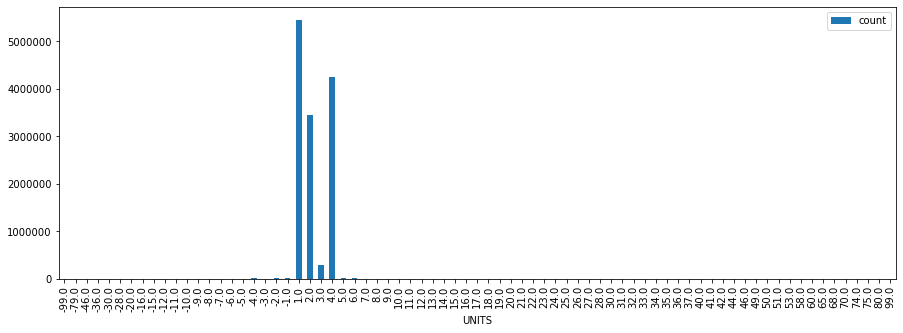

In [172]:
units_summary = pd.DataFrame(master_merged.groupby("UNITS").size(), columns = ["count"])
units_summary.plot(kind = "bar")

# Set the size of the display window
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

In [175]:
pd.set_option('display.max_rows', None)
units_summary_sorted

,count
UNITS,
1.0,5452996
4.0,4244094
2.0,3454221
3.0,280218
6.0,15626
5.0,14472
-1.0,12784
-4.0,12385
-2.0,8165


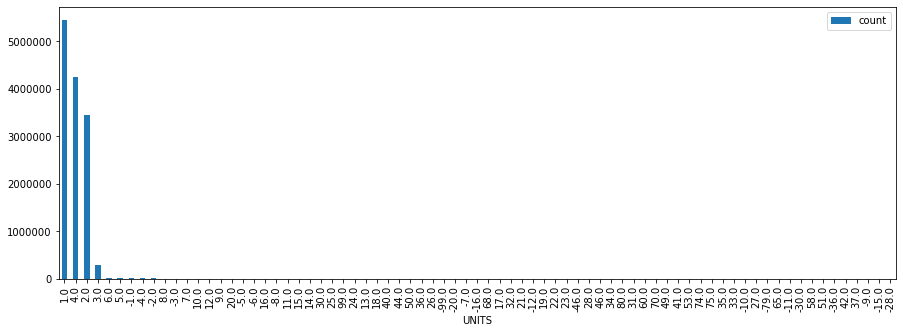

In [173]:
units_summary_sorted = pd.DataFrame(master_merged.groupby("UNITS").size(), columns = ["count"]).sort_values(by=['count'], ascending = False)
units_summary_sorted.plot(kind = "bar")

# Set the size of the display window
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

In [202]:
# # Create example data and plot a bar chart
# data = np.array([10, 20, 30, 40, 50])
# x_labels = ['A', 'B', 'C', 'D', 'E']
# plt.bar(x_labels, data)

# # Set the size of the display window
# fig = plt.gcf()
# fig.set_size_inches(10, 5)

# # Show the plot
# plt.show()